**Normal and Brownian**

In this notebook, MOBOLFI will be implemented to a toy example with two data sources, one is the normal data, the other is the brownian motion with fixed drifte rate.

 $ \theta \sim \mathbb{N}(\theta|0,I) \\ $
 $ X_n \sim \mathbb{N}(x|\theta,I), n = 1,...,N \\ $
 $ y(t)=\theta dt + \sigma dW(t) \\ $

where $N=20$ are the size of data $X$;  $y(t)$, $t\in \mathbb{R}^+$, is a continuous time process; $\sigma=0.5$ is a fixed variance, $W(t)$ is a standard Brownian motion and the initial condition $y(0)=0$; we consider the trajectory $y(t)$ on the range $[0,3]$ and $M=50$ (defined as nsteps below) equally spaced observations over this range, i.e.
$Y_m=y((m-1)\delta)$, where $\delta=3/(M-1)$. 

For details of experiment setup, check our paper's supplementary (paper supplementary link).

In this toy example, the "real data" is the generated data from simualtor model ($X,Y$ defined above) given a true paramater $\theta_{true}$. Our first work is to defien the simlulator in order to generate the "real data" and define the real theta. For simplicity, we define the real theta as $\theta_{true}=(-0.7,0.7,...,-0.7,0.7)^T$

Real theta:[-0.7  0.7 -0.7  0.7 -0.7  0.7 -0.7  0.7 -0.7  0.7]


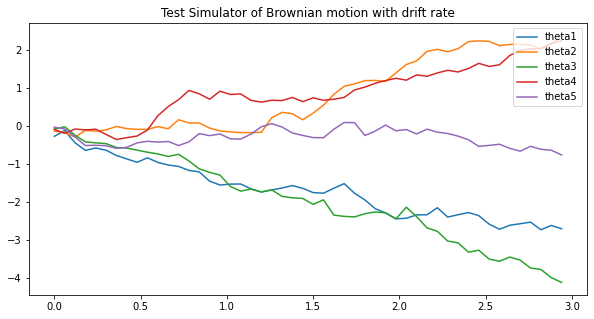

In [1]:
# Build simulator of Brownian Motion with drift rate
import random
import numpy as np
import matplotlib.pyplot as plt

nsteps = 50
interval = 3
def simulate_1d_bm_with_drift(mu, nsteps=nsteps, interval=interval,sigma=0.5):
    """
    mu is a 1 dim 10-elements numpy obj and the drift rate
    nsteps is the size of data source Y
    """
    dt = interval/nsteps
    steps = np.zeros((nsteps,mu.shape[0]))
    for i in range(nsteps):
        steps[i,:] = mu*dt + sigma*np.random.randn(mu.shape[0])*np.sqrt(dt)
    y = np.cumsum(steps,axis=0)
    t = [ dt*i for i in range(nsteps) ]
    return t, steps, y


# Define the real theta
real_theta = np.array([-0.7,0.7,-0.7,0.7,-0.7,0.7,-0.7,0.7,-0.7,0.7])
print("Real theta:{}".format(real_theta))

t, steps, y=simulate_1d_bm_with_drift(mu=real_theta)
plt.figure(figsize=(10,5))
plt.plot(t,y[:,0],label="theta1")
plt.plot(t,y[:,1],label="theta2")
plt.plot(t,y[:,2],label="theta3")
plt.plot(t,y[:,3],label="theta4")
plt.plot(t,y[:,4],label="theta5")
plt.legend(loc=1,fontsize=10)
plt.title("Test Simulator of Brownian motion with drift rate")
plt.show()

In [2]:
def simulator(theta):
    '''
    Simulator of joint (X,Y)
    '''
    # Simulate X
    X = np.random.randn(20,theta.shape[0]) # 20 obs from N(theta,1)
    for i in range(20):
        X[i,:] = X[i,:] + theta
    
    # Simulate Y
    t, S, Y = simulate_1d_bm_with_drift(mu=theta) # t=0,...,3 in 50 discrete steps

    return X,S,Y
    

In [3]:
real_data = simulator(real_theta)
real_data

(array([[-1.29849111e+00,  5.03864492e-01, -1.86868375e+00,
          1.93250874e+00, -1.68203016e+00,  1.50790460e+00,
         -1.08131404e+00,  1.36130332e+00, -2.73941638e-01,
          1.67267974e+00],
        [-5.05415101e-01,  1.19973676e+00, -1.29674884e+00,
          1.80914717e+00, -1.21152698e+00,  1.40900282e+00,
         -9.51250643e-01,  1.07666333e-01, -1.28631523e-01,
          1.19078849e+00],
        [-6.01156668e-01,  1.16252908e+00, -9.03986653e-01,
          1.04613258e-01, -7.87118109e-01, -3.49260123e-01,
          4.59077963e-01,  7.67983681e-01, -1.92130449e+00,
          1.75492265e+00],
        [-7.44750500e-01,  1.18177224e-01, -8.90041641e-01,
          2.01626696e+00,  8.59210088e-01,  7.40693690e-01,
         -1.21657440e+00,  1.06641140e+00, -1.10829923e+00,
          3.26682862e-01],
        [-1.22438648e+00,  4.00347881e-01, -1.59036463e+00,
          1.32129008e+00, -9.27421473e-01,  1.10474474e+00,
         -5.91870537e-01,  6.27187176e-01, -1.802788

Look up mean of X and Y, given drift rate remaining the same across 50 stpes, the incremental change for each step in Y should be similar over all 10 dims.

In [4]:
np.mean(real_data[0],axis=0)

array([-0.55686088,  0.58205221, -0.95504369,  0.9728265 , -0.79758093,
        0.65771756, -0.84678881,  0.85349829, -1.09810485,  0.73469183])

In [5]:
np.mean(real_data[1],axis=0)

array([-0.06977563,  0.03007371, -0.01861517,  0.03572354, -0.05055623,
        0.07757076, -0.04877523,  0.05843059, -0.06852473,  0.05788893])

In [6]:
real_theta*interval/nsteps

array([-0.042,  0.042, -0.042,  0.042, -0.042,  0.042, -0.042,  0.042,
       -0.042,  0.042])

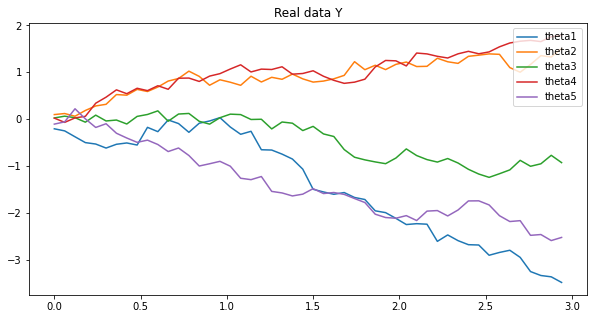

In [7]:
plt.figure(figsize=(10,5))
plt.plot(t,real_data[2][:,0],label="theta1")
plt.plot(t,real_data[2][:,1],label="theta2")
plt.plot(t,real_data[2][:,2],label="theta3")
plt.plot(t,real_data[2][:,3],label="theta4")
plt.plot(t,real_data[2][:,4],label="theta5")
plt.legend(loc=1,fontsize=10)
plt.title("Real data Y")
plt.show()

Next, to implement MOBOLFI, we need to define the simualtionn discrepancy function. This function takes as input a vector of parameters $\theta_i$ (10 dims), outputs the 2-dim vector of simualtion discrepancies $\Delta_1(X^{(i)},X_o),\Delta_2(Y^{(i)},Y_o)$. $i=1,2,...$ denotes the index of observation,

Worth to mention that by convention, the discrepancy function $\Delta$ is applied to the low-dimensional data summary instead of raw data. Due to the simplicity of this example, calculating MSE as the discrepancy here is equivalent to use average as the data summary and $l_2$ norm as the discrepancy. For discrepancy on $Y$, due to the increasing variation of Brownian motion, we instead calculate discreapncy for the increamental change of Y for all steps and finally sum over all 10 dims. 

Given assumption in botorch package we use later, the objectives defined are default to be maximized. Thusly the function below are in fact calculating the negative of discrepnacies.

In [8]:
def minus_simluated_discrepancy(theta, real_data=real_data):

    X_obs, Step_obs, _ = real_data[0], real_data[1], real_data[2]
    X_obs_mean = np.mean(X_obs,axis=0)
    Step_obs_mean = np.mean(Step_obs,axis=0)

    X_theta, Step_theta, _ = simulator(theta)
    X_theta_mean = np.mean(X_theta,axis=0)
    discrepancy_X = np.mean(np.abs(X_theta_mean-X_obs_mean))

    Step_theta_mean = np.mean(Step_theta,axis=0)
    discrepancy_Y = np.sum(np.abs(Step_obs_mean-Step_theta_mean),axis=0)
    discrepancies = np.array([discrepancy_X, discrepancy_Y])

    return discrepancies*-1

In [9]:
# Should be small
minus_simluated_discrepancy(real_theta)

array([-0.3076545 , -0.16056829])

Using the minus_simluated_discrepancy(), we would construct an intial training data for GP model. It consists of 100 obs $\{\theta_i,(X^{(i)},Y^{(i)})\}_{i=1}^{100}$.
In practice, the random sample theta may returns very large discrepnacy values (i.e. very small negative discrepancy values). Though require more sampling time, in practice a few constraints are applied to the construction of initial training data.

Intuitively, a initial training data is "good" if it contains more information about the real distirbution. We set rejection criteria that rejects sample with sample quantiles too large (small after taking the nagative) . The criteria boundary values are manually set, but for sample quanitle criteria, we recommend to use the median of simulated sample that is drawn without any criteria. Morevoer, MSE discrepancy would accpet those parameters the generated data very close to the sample average of the real data, but not showing any variation. To avoid using these paramaters in training, we reject sample with sample variances too small, the criteria boundary values can be manually defined, but is usually chosen as $\lambda*Var(Y)$ for $\lambda \in (0,1)$ and $Y$ real data. These two rejection criteria will be applied in all the notebooks working on this toy example, they significantly imporves the information of initial data we have and thusly improves the convergence of model training and final inference.  

In [11]:
seed = 1248
np.random.seed(seed)

In [12]:
# Firstly, we need to build data for training, i.e. pairs of {theta_i, delta_i}, i=1,...,N
import pandas as pd

num_init_samples = 100
# Write func that generates training data with larger range
def init_sample_generator(num_init_samples = num_init_samples):
    init_sample_theta = np.zeros((num_init_samples, 10)) # theta dim 10
    init_sample_discrepancy = np.zeros((num_init_samples, 2)) # discrepancy dim 2
    i = 0
    while i < num_init_samples:
        init_theta = np.random.randn(10)
        init_discrepancy = minus_simluated_discrepancy(theta = init_theta)
        init_sample_theta[i,:] = init_theta
        init_sample_discrepancy[i,:] = init_discrepancy
        i += 1
    return init_sample_theta,init_sample_discrepancy
    


In [13]:
# Apply two rejection criteria in sampling initial training data
while True:
    init_sample_theta, init_sample_discrepancy = init_sample_generator()
    if init_sample_discrepancy.max(axis=0)[0]>=-0.25 and init_sample_discrepancy.max(axis=0)[1]>=-0.25 and np.var(init_sample_discrepancy[:,1])>=0.08*0.08 and np.var(init_sample_discrepancy[:,0])>=0.25*0.25:
        break
print(pd.DataFrame(init_sample_discrepancy).describe())

                0           1
count  100.000000  100.000000
mean    -0.929352   -0.627775
std      0.259276    0.158984
min     -1.750633   -0.981643
25%     -1.068405   -0.726545
50%     -0.909919   -0.626327
75%     -0.766771   -0.522704
max     -0.238606   -0.230346


In [14]:
# Should be close to real theta
init_sample_theta[np.argmax(init_sample_discrepancy[:,0]),:] 

array([ 0.13507808,  0.46579772, -0.73692386,  0.81241603, -0.33199349,
        0.43278755, -0.91035407, -0.31405766, -0.73973497, -0.00258815])

In [15]:
# Should be close to real theta
init_sample_theta[np.argmax(init_sample_discrepancy[:,1]),:]

array([-0.78566681,  0.67541798, -0.50995926,  1.48765302, -0.47066109,
        0.23641443, -1.69243161,  0.75252065, -0.23490531,  0.53653362])

We use botorcch package in implementing MOBOLFI, the acuisition function is qNEHVI, while the model assumes independence between two objectives. The correlated noise (we assume our observations are noisy) covariacne matrix of the 2 objectives is estimated by sample covariance formula by simulating latest bayesian acquisition, which will be used in constructing the approximate likelihood function.

In [17]:
import torch
from botorch.models.gp_regression import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.optim import optimize_acqf
from botorch.acquisition.multi_objective.monte_carlo import qNoisyExpectedHypervolumeImprovement
from botorch.acquisition.objective import ScalarizedPosteriorTransform
from botorch.optim import optimize_acqf

In [18]:
X = torch.from_numpy(init_sample_theta)
Y = torch.from_numpy(init_sample_discrepancy)

In [19]:
list(init_sample_discrepancy.min(axis=0)-0.1)

[-1.850633092910939, -1.0816434987092658]

In [20]:
train_X = X.double()
train_Y = Y.double()

# As suggested in https://botorch.org/tutorials/multi_objective_bo, ref point is set ot be the expected lower bound the objectives
# We don't have a way to estimate this bound, but we can set the values to be small enough, which is defined to be min(Delta_1, Delta_2)-0.1 here
ref_point = list(init_sample_discrepancy.min(axis=0)-0.1)

# Optimization space for theta
bounds = torch.tensor([[-2,-2,-2,-2,-2,-2,-2,-2,-2,-2],[2,2,2,2,2,2,2,2,2,2]],dtype=torch.double)

In [21]:
import time
start_time = time.time()
import warnings
warnings.filterwarnings("ignore")

number_of_iterGPtraining = 200

for i in range(number_of_iterGPtraining):
    # For each iteration, train the GP model using current training data
    gp = SingleTaskGP(train_X, train_Y)
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    fit_gpytorch_mll(mll)

    # Define the acuisition function using current training data
    qNEHVI = qNoisyExpectedHypervolumeImprovement(gp, ref_point, train_X)

    candidate, acq_value = optimize_acqf(
      qNEHVI, bounds=bounds, q=1, num_restarts=10, raw_samples=100)


    # Include new acuisition into training data
    train_X = torch.cat((train_X, candidate)).double()
    candidate_X = candidate.flatten().numpy()
    candidate_Y = minus_simluated_discrepancy(theta = candidate_X)
    candidate_Y = torch.from_numpy(candidate_Y)
    train_Y = torch.cat((train_Y, candidate_Y.view(1,-1))).double()

    if i % 5 == 0:
        # Print the newest proposed parameter point and corresponding acuisition function value, real discrepancies and predicted discrepancies (mean)
        print("Iteration: {}\t".format(i+1))
        print("New parameter point: {}\t".format(candidate.tolist()))
        print("Acuisition function value: {}\t".format(acq_value.item()))
        print("Real discrepancy result: {}\t".format(candidate_Y.tolist()))
        print("Predicted discrepancy result: {}\t".format(gp.posterior(candidate).mean.tolist()))




print("Running time for GP training: --- %s seconds ---" % (time.time() - start_time))


Iteration: 1	
New parameter point: [[-0.10819687187133467, -0.11836267798388107, 1.0741755080783921, -0.8438946236121486, 0.4226374705734, 1.5526459299841047, -1.0253222222284046, 0.2925225177486021, -0.7109954956345099, 0.36775337820838583]]	
Acuisition function value: 0.0004090438180786068	
Real discrepancy result: [-0.7137827815412175, -0.5985109036391169]	
Predicted discrepancy result: [[-0.9283510388284303, -0.6275381828521518]]	
Iteration: 6	
New parameter point: [[-0.22490927257818435, -0.8979138043341099, -0.3333250099075762, 0.8180672391484476, -0.4123075694103285, 1.6960827797236282, -1.0512605501738015, 1.1349937348404677, -0.32339284157737236, -0.40304569387660805]]	
Acuisition function value: 0.00011790212333402978	
Real discrepancy result: [-0.5547353937445056, -0.46269935145646335]	
Predicted discrepancy result: [[-0.9233257595450354, -0.6242235909646154]]	
Iteration: 11	
New parameter point: [[0.6445347207162919, 0.5227240227046303, -0.47253125259342466, -0.622215603754

In [22]:
# Test gp model prediction, should be close to the minus_simluated_discrepancy(real_theta)
gp.posterior(torch.Tensor(real_theta).view(1,-1)).mean

tensor([[-0.3543, -0.2024]], dtype=torch.float64, grad_fn=<TransposeBackward0>)

In [23]:
# Latest iteration prediction
gp.posterior(train_X[-1,:].view(1,-1)).mean

tensor([[-1.3284, -0.8500]], dtype=torch.float64, grad_fn=<TransposeBackward0>)

In [24]:
# Construct a dataframe that stores all the prediction results
training_results = np.zeros((train_Y.size()[0], 6))

for i in range(train_Y.size()[0]):
    real_obj = train_Y[i,:]
    pred_obj = gp.posterior(train_X[i,:].view(1,-1)).mean
    pred_var = gp.posterior(train_X[i,:].view(1,-1)).variance
    botorchlikelihood1 = torch.distributions.Normal(loc=pred_obj[0][0], scale=pred_var[0][1]).log_prob(real_obj[0])
    botorchlikelihood2 = torch.distributions.Normal(loc=pred_obj[0][0], scale=pred_var[0][1]).log_prob(real_obj[0])
    botorchlikelihood = botorchlikelihood1+botorchlikelihood2
    training_results[i,:] = [i,real_obj[0].item(),real_obj[1].item(),pred_obj[0][0].item(),pred_obj[0][1].item(),botorchlikelihood.item()]

training_results

array([[ 0.00000000e+00, -1.06741727e+00, -7.78948818e-01,
        -1.07563886e+00, -7.74045728e-01, -8.51016153e+01],
       [ 1.00000000e+00, -1.11693758e+00, -7.22027477e-01,
        -1.10794773e+00, -7.26968108e-01, -1.00628092e+02],
       [ 2.00000000e+00, -6.32404637e-01, -5.47732298e-01,
        -6.76241391e-01, -5.44768569e-01, -2.85490460e+03],
       ...,
       [ 2.97000000e+02, -4.08969933e-01, -2.64720804e-01,
        -4.33776654e-01, -2.76566666e-01, -1.11190029e+03],
       [ 2.98000000e+02, -8.48716350e-01, -5.65206077e-01,
        -8.58367846e-01, -5.59625384e-01, -1.13084459e+02],
       [ 2.99000000e+02, -1.41889266e+00, -8.74563850e-01,
        -1.32838557e+00, -8.49962801e-01, -1.28339665e+02]])

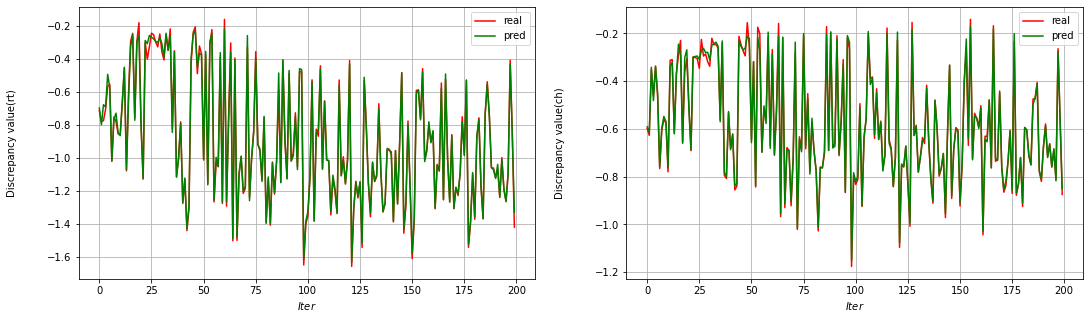

In [26]:
# Draw training curves
# Two curves should almost match together, meaning accurate prediction
font_size_text = 10
fs=10


fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(training_results[num_init_samples:,0]-num_init_samples, training_results[num_init_samples:,1], color='red', label='real')
axs[0].plot(training_results[num_init_samples:,0]-num_init_samples, training_results[num_init_samples:,3],'green',label='pred',)
axs[0].legend(loc=1,fontsize=fs)
axs[0].grid()
axs[0].tick_params(axis='both', labelsize=fs)
axs[0].set_xlabel(r'$Iter$',fontsize=font_size_text)
axs[0].set_ylabel(r'Discrepancy value(rt)',fontsize=font_size_text,rotation='vertical',labelpad=30)

axs[1].plot(training_results[num_init_samples:,0]-num_init_samples, training_results[num_init_samples:,2], color='red', label='real')
axs[1].plot(training_results[num_init_samples:,0]-num_init_samples, training_results[num_init_samples:,4],'green',label='pred')
axs[1].legend(loc=1,fontsize=fs)
axs[1].grid()
axs[1].tick_params(axis='both', labelsize=fs)
axs[1].set_xlabel(r'$Iter$',fontsize=font_size_text)
axs[1].set_ylabel(r'Discrepancy value(ch)',fontsize=font_size_text,rotation='vertical',labelpad=30)


plt.show()

In [27]:
# estimate covaraince using the latest BO candidate
Y_cov = np.zeros((200,2))
index = np.argmax(training_results[:,-1])
X_cov = train_X[index,:].flatten().numpy()
for i in range(200):
    Y_cov[i,:] = minus_simluated_discrepancy(theta = X_cov)

cov_est_noise = np.cov(Y_cov, rowvar = False)

In [28]:
cov_est_noise

array([[0.00467025, 0.00026434],
       [0.00026434, 0.00297372]])

Now we can build the approximate likelihood as MOBOLFI proposes. The function takes as input the input parameter $\theta$, trained gp model (and its prediction), choice of tolerance and estimated noise covariance matrix. Tolerance is chosen aas the 1% quantile of the total training data.

In [30]:
from scipy.stats import multivariate_normal
tol = torch.quantile(train_Y,q=0.99,dim=0).tolist()# Test quantile tol level vs marginal posterior, approx ll is very sensitive to tol level!
print(tol)


def approximate_log_likelihood(theta,tol=tol,cov_noise=cov_est_noise,gp=gp,covariance=0):
  theta = theta.view(1,-1)
  preds = gp.posterior(theta)
  means, variances = preds.mean, preds.variance
  means = means.view(-1).detach().numpy() * -1
  Sigma = np.array([[variances[0][0].item(),covariance],
                    [covariance,variances[0][1].item()]])
  cov_matrix = cov_noise + Sigma
  mulnorm = multivariate_normal(mean=means, cov=cov_matrix)
  log_likelihood = torch.Tensor([mulnorm.logpdf([-tol[0],-tol[1]])]).reshape(-1)
  return log_likelihood

[-0.21906790797122166, -0.1588534992899207]


In [31]:
approximate_log_likelihood(theta=train_X[-1,:].view(-1)) #Input is defined to be 1d tensor, which satisfies need of MCMC package

tensor([-44.7569])

In [32]:
approximate_log_likelihood(theta=torch.Tensor(real_theta).view(-1)) # should be a large value

tensor([1.7319])

In [33]:
def log_prior(theta):# theta is 1d tensor
    '''Define the log prior of theta'''
    lp_log_theta = torch.distributions.Normal(loc=0, scale=1).log_prob(theta)
    # print(lp_log_theta)
    lp = torch.sum(lp_log_theta)

    return lp

In [34]:
log_prior(theta=train_X[-150,:].view(-1))

tensor(-15.4220, dtype=torch.float64)

In [35]:
#Test prior function
priors = np.zeros(train_X.size()[0])
for i in range(train_X.size()[0]):
    param = train_X[i,:].view(-1)
    priors[i] = log_prior(param)

df_describe = pd.DataFrame(priors)
prior_median = df_describe.median()
df_describe.describe()


,0
count,300.000000
mean,-14.369988
std,2.562037
min,-26.136343
25%,-15.964561
50%,-14.105630
75%,-12.498237
max,-9.959338


In [36]:
# Test likelihood function
likelihoods = np.zeros(train_X.size()[0])
for i in range(train_X.size()[0]):
    param = train_X[i,:].view(-1)
    likelihoods[i] = approximate_log_likelihood(param)

df_describe = pd.DataFrame(likelihoods)
df_describe.describe()

,0
count,300.000000
mean,-67.614016
std,52.358021
min,-257.626404
25%,-100.357285
50%,-62.286648
75%,-26.727588
max,2.597306


In [37]:
# MOBOLFI approximate posterior, from which we apply MCMC to draw saamples of paramters for inference
def approximate_log_posterior(theta):
  ll = approximate_log_likelihood(theta)
  lprior = log_prior(theta)
  lp = lprior + ll - prior_median.item()
  return lp

In [38]:
approximate_log_posterior(theta=candidate.view(-1))

tensor([-48.2393])

Hamilton MCMC is applied to draw samples from the approximate posterior, the true posterior would be the sum of log posterior fo normal and the log posterior of the Brownian motion (here is a Guassian Process since drift rate is fixed). Compare the samples from MOBOLFI posterior and curves of real posterior.

In [39]:
import hamiltorch
%matplotlib inline

In [40]:
hamiltorch.set_random_seed(1234)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(hamiltorch.__version__)

0.4.1


In [41]:
# Set up the HMC parameters
N = 8000
step_size = .1
L = 1

In [42]:
# HMC
start_time = time.time()
hamiltorch.set_random_seed(123)
params_init = candidate.view(-1)
params_hmc = hamiltorch.sample(log_prob_func=approximate_log_posterior, params_init=params_init, num_samples=N,
                               step_size=step_size, num_steps_per_sample=L)

print("Time for Hamilton MCMC sampling --- %s seconds ---" % (time.time() - start_time))

Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples   | Samples/sec
0d:00:01:13 | 0d:00:00:00 | #################### | 8000/8000 | 108.44       
Acceptance Rate 0.76
Time for Hamilton MCMC sampling --- 73.8173258304596 seconds ---


In [43]:
coords_hmc = torch.cat(params_hmc).reshape(len(params_hmc),-1).numpy()
# burn-in the first 1000 samples
coords_hmc = coords_hmc[1000:,:]

To check whether including multiple data sources enahnce the inference, we also draw HMC samples from the approxiamte likelihood using 1-dim prediction of one data source. Later, we will compare them in one plot.

In [45]:
# Approximate likelihood using one data source
tol = torch.quantile(train_Y,q=0.99,dim=0).tolist()
print(tol)

def approximate_log_likelihood_X(theta,tol=tol,cov_noise=cov_est_noise,gp=gp):
  theta = theta.view(1,-1)
  preds = gp.posterior(theta)
  means, variances = preds.mean, preds.variance
  means = means * -1
  item1 = (-tol[0]-means[0][0])/torch.sqrt(variances[0][0]+cov_noise[0][0])
  prob1 = 0.5 * (1 + torch.erf(item1 / torch.sqrt(torch.tensor(2))))
  log_likelihood = torch.log(prob1)
  return log_likelihood

def approximate_log_likelihood_Y(theta,tol=tol,cov_noise=cov_est_noise,gp=gp):
  theta = theta.view(1,-1)
  preds = gp.posterior(theta)
  means, variances = preds.mean, preds.variance
  means = means * -1
  item2 = (-tol[1]-means[0][1])/torch.sqrt(variances[0][1]+cov_noise[1][1])
  prob2 = 0.5 * (1 + torch.erf(item2 / torch.sqrt(torch.tensor(2))))
  log_likelihood = torch.log(prob2)
  return log_likelihood

[-0.21906790797122166, -0.1588534992899207]


In [46]:
print(approximate_log_likelihood_X(theta=train_X[-1,:].view(-1))) #Input is defined to be 1d tensor, which satisfies need of MCMC package
print(approximate_log_likelihood_X(theta=torch.Tensor(real_theta).view(-1))) # should be large

print(approximate_log_likelihood_Y(theta=train_X[-1,:].view(-1))) #Input is defined to be 1d tensor, which satisfies need of MCMC package
print(approximate_log_likelihood_Y(theta=torch.Tensor(real_theta).view(-1))) # should be large


likelihoods_rt = np.zeros(train_X.size()[0])
for i in range(train_X.size()[0]):
    param = train_X[i,:].view(-1)
    likelihoods_rt[i] = approximate_log_likelihood_X(param)

df_describe = pd.DataFrame(likelihoods_rt)
df_describe.describe()

likelihoods_ch = np.zeros(train_X.size()[0])
for i in range(train_X.size()[0]):
    param = train_X[i,:].view(-1)
    likelihoods_ch[i] = approximate_log_likelihood_Y(param)

df_describe = pd.DataFrame(likelihoods_ch)
df_describe.describe()


def approximate_log_posterior_X(theta):
  ll = approximate_log_likelihood_X(theta)
  lprior = log_prior(theta)
  lp = lprior + ll - prior_median.item()
  return lp

def approximate_log_posterior_Y(theta):
  ll = approximate_log_likelihood_Y(theta)
  lprior = log_prior(theta)
  lp = lprior + ll - prior_median.item()
  return lp



hamiltorch.set_random_seed(1234)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(hamiltorch.__version__)


# Set up the HMC parameters
N = 8000
step_size = .2
L = 1

# HMC for the two likelihood using one data soruce
start_time = time.time()
hamiltorch.set_random_seed(123)
params_init = candidate.view(-1)

params_hmc_X = hamiltorch.sample(log_prob_func=approximate_log_posterior_X, params_init=params_init, num_samples=N,
                               step_size=step_size, num_steps_per_sample=L)

print("Time for Hamilton MCMC sampling --- %s seconds ---" % (time.time() - start_time))


coords_hmc_X = torch.cat(params_hmc_X).reshape(len(params_hmc_X),-1).numpy()
# burn-in the first 1000 samples
coords_hmc_X = coords_hmc_X[1000:,:]


params_hmc_Y = hamiltorch.sample(log_prob_func=approximate_log_posterior_Y, params_init=params_init, num_samples=N,
                               step_size=step_size, num_steps_per_sample=L)

print("Time for Hamilton MCMC sampling --- %s seconds ---" % (time.time() - start_time))


coords_hmc_Y = torch.cat(params_hmc_Y).reshape(len(params_hmc_Y),-1).numpy()
# burn-in the first 1000 samples
coords_hmc_Y = coords_hmc_Y[1000:,:]

tensor(-28.4665, dtype=torch.float64, grad_fn=<LogBackward0>)
tensor(-3.4162, dtype=torch.float64, grad_fn=<LogBackward0>)
tensor(-25.0985, dtype=torch.float64, grad_fn=<LogBackward0>)
tensor(-1.4984, dtype=torch.float64, grad_fn=<LogBackward0>)


0.4.1
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples   | Samples/sec
0d:00:01:25 | 0d:00:00:00 | #################### | 8000/8000 | 93.59        
Acceptance Rate 0.97
Time for Hamilton MCMC sampling --- 85.5371994972229 seconds ---
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples   | Samples/sec
0d:00:01:23 | 0d:00:00:00 | #################### | 8000/8000 | 95.45        
Acceptance Rate 0.98
Time for Hamilton MCMC sampling --- 169.41028428077698 seconds ---


The following chunks reproduces BOLFI method using 1-dim training objective. The codes are almost similar to the implementation of MOBOLFI above except that in BOLFI we defien the training objective as the sum of 2 discrepancies.

In [47]:
def minus_simluated_discrepancy_bolfi(theta, real_data=real_data):

    X_obs, Step_obs, _ = real_data[0], real_data[1], real_data[2]
    X_obs_mean = np.mean(X_obs,axis=0)
    Step_obs_mean = np.mean(Step_obs,axis=0)

    X_theta, Step_theta, _ = simulator(theta)
    X_theta_mean = np.mean(X_theta,axis=0)
    discrepancy_X = np.mean(np.abs(X_theta_mean-X_obs_mean))

    Step_theta_mean = np.mean(Step_theta,axis=0)
    discrepancy_Y = np.sum(np.abs(Step_obs_mean-Step_theta_mean),axis=0)
    discrepancies = np.array([discrepancy_X, discrepancy_Y])
    discrepancy = discrepancies[0]*0.7+discrepancies[1] #tuning the weight
    # discrepancy = discrepancies[0]

    return discrepancy*-1


# Should be small
print(minus_simluated_discrepancy_bolfi(real_theta))


seed = 1248
np.random.seed(seed)


num_init_samples = 100
# Write func that generates training data with larger range
def init_sample_generator_bolfi(num_init_samples = num_init_samples):
    init_sample_theta = np.zeros((num_init_samples, 10)) # theta dim 10
    init_sample_discrepancy = np.zeros((num_init_samples, 1)) # discrepancy dim 1
    i = 0
    while i < num_init_samples:
        init_theta = np.random.randn(10)
        init_discrepancy = minus_simluated_discrepancy_bolfi(theta = init_theta)
        init_sample_theta[i,:] = init_theta
        init_sample_discrepancy[i,:] = init_discrepancy
        i += 1
    return init_sample_theta, init_sample_discrepancy

while True:
    init_sample_theta, init_sample_discrepancy = init_sample_generator_bolfi()
    if init_sample_discrepancy.max()>=-0.4 and np.var(init_sample_discrepancy)>=0.2*0.2: # Make sure the training data is not too far away from 0, and not too concentrated
        break
print(pd.DataFrame(init_sample_discrepancy).describe())



-0.3473826682748813


                0
count  100.000000
mean    -1.288071
std      0.295959
min     -1.869429
25%     -1.516909
50%     -1.293062
75%     -1.079993
max     -0.391999


In [48]:
# Should be close to real theta
init_sample_theta[np.argmax(init_sample_discrepancy[:,]),:] 

array([-0.51511456,  0.4738815 ,  0.0954833 ,  1.09351405, -1.18363863,
        0.41801989, -0.54206336,  0.96406764, -0.51537697,  0.21009229])

In [49]:
from botorch.acquisition import UpperConfidenceBound

print(init_sample_theta[np.argmax(init_sample_discrepancy),:])
X = torch.from_numpy(init_sample_theta)
Y = torch.from_numpy(init_sample_discrepancy)
train_X = X.double()
train_Y = Y.double()



bounds = torch.tensor([[-2,-2,-2,-2,-2,-2,-2,-2,-2,-2],[2,2,2,2,2,2,2,2,2,2]],dtype=torch.double)

start_time = time.time()
warnings.filterwarnings("ignore")

number_of_iterGPtraining = 200

for i in range(number_of_iterGPtraining):
    # For each iteration, train the GP model using current training data
    gp = SingleTaskGP(train_X, train_Y)
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    fit_gpytorch_mll(mll)
    
    betai = np.sqrt(2*np.log(np.power(i+1,2)*np.power(np.pi,2)/(3*0.1)))
    # Define the acuisition function using current training data
    UCB = UpperConfidenceBound(gp, beta=betai)

    candidate, acq_value = optimize_acqf(
    UCB, bounds=bounds, q=1, num_restarts=5, raw_samples=20,)


    # Include new acuisition into training data
    train_X = torch.cat((train_X, candidate)).double()
    candidate_X = candidate.flatten().numpy()
    candidate_Y = minus_simluated_discrepancy_bolfi(theta = candidate_X)
    candidate_Y = torch.Tensor([candidate_Y])
    train_Y = torch.cat((train_Y, candidate_Y.view(1,-1))).double()

    if i % 5 == 0:
        # Print the newest proposed parameter point and corresponding acuisition function value, real discrepancies and predicted discrepancies (mean)
        print("Iteration: {}\t".format(i+1))
        print("New parameter point: {}\t".format(candidate.tolist()))
        print("Acuisition function value: {}\t".format(acq_value.item()))
        print("Real discrepancy result: {}\t".format(candidate_Y.tolist()))
        print("Predicted discrepancy result: {}\t".format(gp.posterior(candidate).mean.tolist()))


print("Running time for GP training: --- %s seconds ---" % (time.time() - start_time))

[-0.51511456  0.4738815   0.0954833   1.09351405 -1.18363863  0.41801989
 -0.54206336  0.96406764 -0.51537697  0.21009229]
Iteration: 1	
New parameter point: [[-0.8614620471269583, -0.15711864792717564, 0.8822835982993582, 0.133999103154147, 0.2567397128605003, 0.22081766539221256, -1.1333248678922334, 0.7714686428745083, 0.222611425059145, 0.941421095510431]]	
Acuisition function value: -0.7238524507315324	
Real discrepancy result: [-0.8378167748451233]	
Predicted discrepancy result: [[-1.1040340067361378]]	
Iteration: 6	
New parameter point: [[0.7768439418025589, 0.5234089233082927, 0.5790146530782599, -0.6058103786447434, -0.47755184469218087, 0.18664731200247295, -0.021230691221357737, 1.339195776306637, -0.42442207082832506, 0.32091562769684334]]	
Acuisition function value: -0.5686587628198947	
Real discrepancy result: [-0.9734218120574951]	
Predicted discrepancy result: [[-1.0250848565188222]]	
Iteration: 11	
New parameter point: [[-0.3721589244124966, 0.4531996045730311, -0.2795

tensor([[-0.4820]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)


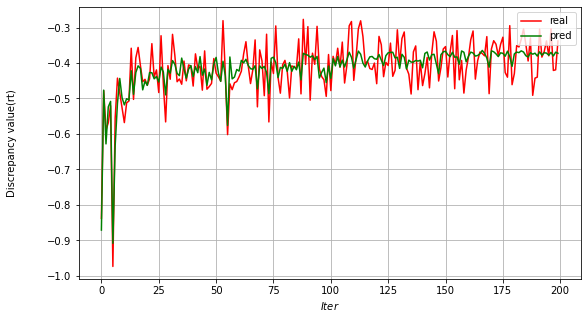

In [50]:
print(gp.posterior(torch.Tensor(real_theta).view(1,-1)).mean)
training_results = np.zeros((train_Y.size()[0], 4))

for i in range(train_Y.size()[0]):
    real_obj = train_Y[i,:]
    pred_obj = gp.posterior(train_X[i,:].view(1,-1)).mean
    pred_var = gp.posterior(train_X[i,:].view(1,-1)).variance
    botorchlikelihood = torch.distributions.Normal(loc=pred_obj, scale=pred_var[0]).log_prob(real_obj)
    training_results[i,:] = [i,real_obj.item(),pred_obj[0].item(),botorchlikelihood.item()]

training_results

# Draw training curves
# Two curves should almost match together, menaing accurate prediction
font_size_text = 10
fs=10


fig, axs = plt.subplots(1, 1, figsize=(9,5))
axs.plot(training_results[num_init_samples:,0]-num_init_samples, training_results[num_init_samples:,1], color='red', label='real')
axs.plot(training_results[num_init_samples:,0]-num_init_samples, training_results[num_init_samples:,2],'green',label='pred',)
axs.legend(loc=1,fontsize=fs)
axs.grid()
axs.tick_params(axis='both', labelsize=fs)
axs.set_xlabel(r'$Iter$',fontsize=font_size_text)
axs.set_ylabel(r'Discrepancy value(rt)',fontsize=font_size_text,rotation='vertical',labelpad=30)



plt.show()

In [51]:
#estimate covaraince using the latest BO acquisition
Y_cov = np.zeros((200,1))
index = np.argmax(training_results[:,-1])
X_cov = train_X[index,:].flatten().numpy()
for i in range(200):
    Y_cov[i,:] = minus_simluated_discrepancy_bolfi(theta = X_cov)

cov_est_noise = np.cov(Y_cov, rowvar = False)



tol = torch.quantile(train_Y,q=0.99).tolist()
print(tol)

def approximate_log_likelihood_bolfi(theta,tol=tol,cov_noise=cov_est_noise,gp=gp,covariance=0):
  theta = theta.view(1,-1)
  preds = gp.posterior(theta)
  means, variances = preds.mean, preds.variance
  means = means.view(-1).detach().numpy() * -1
  Sigma = np.array([variances[0].item()])
  cov_matrix = cov_noise + Sigma
  mulnorm = multivariate_normal(mean=means, cov=cov_matrix)
  log_likelihood = torch.Tensor([mulnorm.logpdf([-tol])]).reshape(-1)
  return log_likelihood



print(approximate_log_likelihood(theta=train_X[-1,:].view(-1))) #Input is defined to be 1d tensor theta, which satisfies need of MCMC package
print(approximate_log_likelihood(theta=torch.Tensor(real_theta).view(-1))) # should be large and larger than value of the chunk above


def log_prior_bolfi(theta):# theta is 1d tensor
    lp_log_theta = torch.distributions.Normal(loc=0, scale=1).log_prob(theta)
    # print(lp_log_theta)
    lp = torch.sum(lp_log_theta)

    return lp

#Test prior
priors = np.zeros(train_X.size()[0])
for i in range(train_X.size()[0]):
    param = train_X[i,:].view(-1)
    priors[i] = log_prior_bolfi(param)

df_describe = pd.DataFrame(priors)
prior_median = df_describe.median()
df_describe.describe()

likelihoods = np.zeros(train_X.size()[0])
for i in range(train_X.size()[0]):
    param = train_X[i,:].view(-1)
    likelihoods[i] = approximate_log_likelihood_bolfi(param)

df_describe = pd.DataFrame(likelihoods)
df_describe.describe()



def approximate_log_posterior_bolfi(theta):
  ll = approximate_log_likelihood_bolfi(theta)
  lprior = log_prior_bolfi(theta)
  lp = lprior + ll - prior_median.item()
  return lp


hamiltorch.set_random_seed(1234)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(hamiltorch.__version__)


# Set up the HMC parameters
N = 8000
step_size = .2
L = 1

# HMC
start_time = time.time()
hamiltorch.set_random_seed(123)
params_init = candidate.view(-1)
params_hmc_bolfi = hamiltorch.sample(log_prob_func=approximate_log_posterior_bolfi, params_init=params_init, num_samples=N,
                               step_size=step_size, num_steps_per_sample=L)

print("Time for Hamilton MCMC sampling --- %s seconds ---" % (time.time() - start_time))


coords_hmc_bolfi = torch.cat(params_hmc_bolfi).reshape(len(params_hmc_bolfi),-1).numpy()
# burn-in the first 1000 samples
coords_hmc_bolfi = coords_hmc_bolfi[1000:,:]

-0.28308780282735824
tensor([2.6462])
tensor([1.7319])
0.4.1
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples   | Samples/sec
0d:00:00:51 | 0d:00:00:00 | #################### | 8000/8000 | 154.55       
Acceptance Rate 0.63
Time for Hamilton MCMC sampling --- 51.800121784210205 seconds ---


Visuals

In [52]:
import math
vxx = torch.linspace(-3,3,200)
p = torch.distributions.Normal(0,1)

# The true posterior function
# Prior is standard normal
# Likelihood consists of two parts: 1. Normal data X follows N(theta,1)  2. Gaussian Process data Y, the step changes of trajectory Y follows N(theta*interval/nsteps,sigma*sqrt(interval/nsteps)) independently


lltheta = torch.linspace(-3,3,200)

true_post = np.zeros((200,10))
true_post_x = np.zeros((200,10))
true_post_y = np.zeros((200,10))

for j in range(10):
    true_post_mar = np.zeros(200)
    true_post_mar_x = np.zeros(200)
    true_post_mar_y = np.zeros(200)
    for i in range(200):
        ltheta = lltheta[i]
        px = torch.distributions.Normal(ltheta,1)
        py = torch.distributions.Normal(ltheta*interval/nsteps,0.5*np.sqrt(interval/nsteps))
        ll_pdfx = torch.sum(px.log_prob(torch.from_numpy(real_data[0][:,j])))
        ll_pdfy = torch.sum(py.log_prob(torch.from_numpy(real_data[1][:,j])))
        true_post_mar_x[i] = np.exp(ll_pdfx + p.log_prob(ltheta))
        true_post_mar_y[i] = np.exp(ll_pdfy + p.log_prob(ltheta))
        true_post_mar[i] = np.exp(ll_pdfx + ll_pdfy + p.log_prob(ltheta))
    

    true_post_mar = (true_post_mar - np.min(true_post_mar))/(np.max(true_post_mar)-np.min(true_post_mar))
    true_post_mar_x = (true_post_mar_x - np.min(true_post_mar_x))/(np.max(true_post_mar_x)-np.min(true_post_mar_x))
    true_post_mar_y = (true_post_mar_y - np.min(true_post_mar_y))/(np.max(true_post_mar_y)-np.min(true_post_mar_y))
    true_post[:,j] = true_post_mar
    true_post_x[:,j] = true_post_mar_x
    true_post_y[:,j] = true_post_mar_y


true_post


array([[4.42266543e-041, 0.00000000e+000, 2.11540719e-044, ...,
        0.00000000e+000, 1.35428110e-034, 0.00000000e+000],
       [4.61963475e-040, 6.19673127e-092, 2.43031852e-043, ...,
        3.00005193e-097, 1.16041108e-033, 1.74970731e-071],
       [4.68282893e-039, 2.18419313e-090, 2.70962870e-042, ...,
        1.16786285e-095, 9.64919228e-033, 4.09700155e-070],
       ...,
       [7.00495117e-092, 4.91791460e-040, 4.67910339e-087, ...,
        1.14054225e-036, 2.42890717e-102, 1.29053808e-055],
       [1.93170231e-093, 4.71194475e-041, 1.41542374e-088, ...,
        1.21010834e-037, 5.52095960e-104, 8.09690747e-057],
       [0.00000000e+000, 4.38123384e-042, 0.00000000e+000, ...,
        1.24598974e-038, 0.00000000e+000, 4.92998874e-058]])

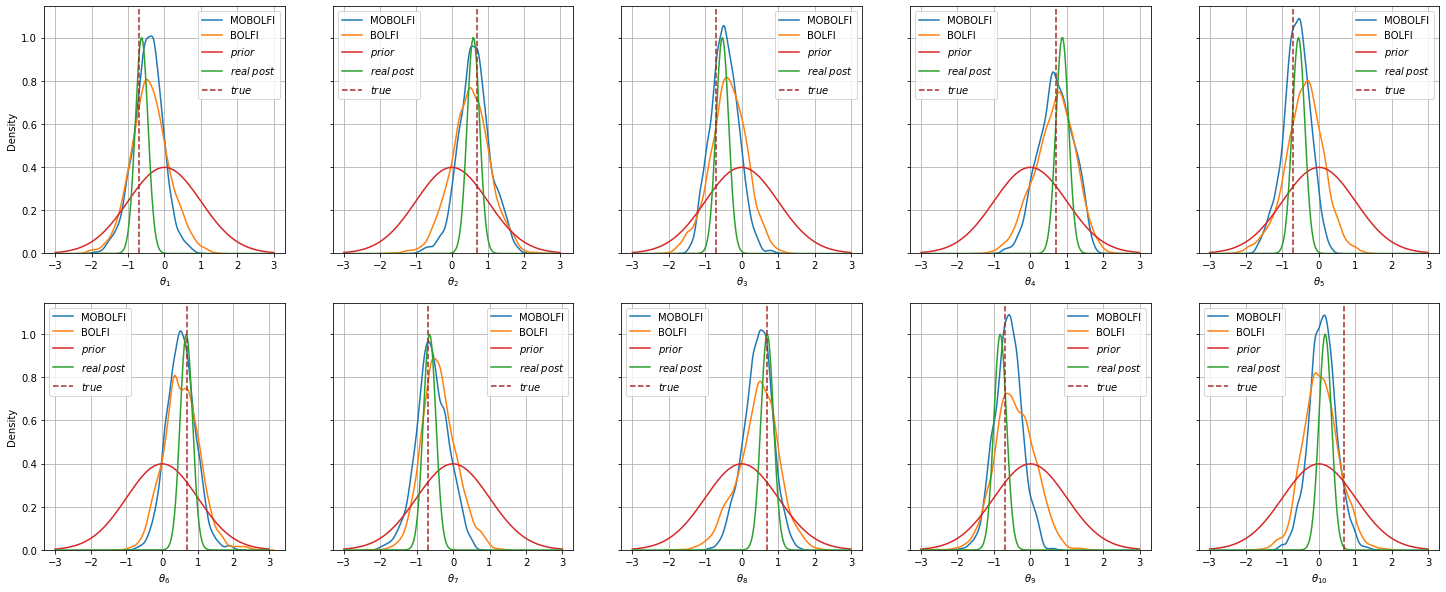

In [53]:
import seaborn as sns
# MOBOLFI vs BOLFI vs real posterior
font_size_text = 10
fs=10

vxx = torch.linspace(-3,3,200)
p = torch.distributions.Normal(0,1)
prior_pdf = torch.exp(p.log_prob(vxx))



fig, axs = plt.subplots(2, 5, figsize=(25,10),sharey=True)

sns.kdeplot(coords_hmc[:,0], ax=axs[0][0], label='MOBOLFI')
sns.kdeplot(coords_hmc_bolfi[:,0], ax=axs[0][0], label='BOLFI')
axs[0][0].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][0].plot(lltheta.numpy(), true_post[:,0],label='$real\;post$')
axs[0][0].axvline(real_theta[0],0,1,linestyle="--",c='brown',label='$true$')
axs[0][0].legend(loc=1,fontsize=fs)
axs[0][0].grid()
axs[0][0].tick_params(axis='both', labelsize=fs)
axs[0][0].set_xlabel(r'$\theta_1$',fontsize=font_size_text)


sns.kdeplot(coords_hmc[:,1], ax=axs[0][1], label='MOBOLFI')
sns.kdeplot(coords_hmc_bolfi[:,1], ax=axs[0][1], label='BOLFI')
axs[0][1].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][1].plot(lltheta.numpy(), true_post[:,1],label='$real\;post$')
axs[0][1].axvline(real_theta[1],0,1,linestyle="--",c='brown',label='$true$')
axs[0][1].legend(loc=2,fontsize=fs)
axs[0][1].grid()
axs[0][1].tick_params(axis='both', labelsize=fs)
axs[0][1].set_xlabel(r'$\theta_2$',fontsize=font_size_text)


sns.kdeplot(coords_hmc[:,2], ax=axs[0][2], label='MOBOLFI')
sns.kdeplot(coords_hmc_bolfi[:,2], ax=axs[0][2], label='BOLFI')
axs[0][2].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][2].plot(lltheta.numpy(), true_post[:,2],label='$real\;post$')
axs[0][2].axvline(real_theta[2],0,1,linestyle="--",c='brown',label='$true$')
axs[0][2].legend(loc=1,fontsize=fs)
axs[0][2].grid()
axs[0][2].tick_params(axis='both', labelsize=fs)
axs[0][2].set_xlabel(r'$\theta_3$',fontsize=font_size_text)


sns.kdeplot(coords_hmc[:,3], ax=axs[0][3], label='MOBOLFI')
sns.kdeplot(coords_hmc_bolfi[:,3], ax=axs[0][3], label='BOLFI')
axs[0][3].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][3].plot(lltheta.numpy(), true_post[:,3],label='$real\;post$')
axs[0][3].axvline(real_theta[3],0,1,linestyle="--",c='brown',label='$true$')
axs[0][3].legend(loc=2,fontsize=fs)
axs[0][3].grid()
axs[0][3].tick_params(axis='both', labelsize=fs)
axs[0][3].set_xlabel(r'$\theta_4$',fontsize=font_size_text)


sns.kdeplot(coords_hmc[:,4], ax=axs[0][4], label='MOBOLFI')
sns.kdeplot(coords_hmc_bolfi[:,4], ax=axs[0][4], label='BOLFI')
axs[0][4].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][4].plot(lltheta.numpy(), true_post[:,4],label='$real\;post$')
axs[0][4].axvline(real_theta[4],0,1,linestyle="--",c='brown',label='$true$')
axs[0][4].legend(loc=1,fontsize=fs)
axs[0][4].grid()
axs[0][4].tick_params(axis='both', labelsize=fs)
axs[0][4].set_xlabel(r'$\theta_5$',fontsize=font_size_text)


sns.kdeplot(coords_hmc[:,5], ax=axs[1][0], label='MOBOLFI')
sns.kdeplot(coords_hmc_bolfi[:,5], ax=axs[1][0], label='BOLFI')
axs[1][0].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][0].plot(lltheta.numpy(), true_post[:,5],label='$real\;post$')
axs[1][0].axvline(real_theta[5],0,1,linestyle="--",c='brown',label='$true$')
axs[1][0].legend(loc=2,fontsize=fs)
axs[1][0].grid()
axs[1][0].tick_params(axis='both', labelsize=fs)
axs[1][0].set_xlabel(r'$\theta_6$',fontsize=font_size_text)


sns.kdeplot(coords_hmc[:,6], ax=axs[1][1], label='MOBOLFI')
sns.kdeplot(coords_hmc_bolfi[:,6], ax=axs[1][1], label='BOLFI')
axs[1][1].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][1].plot(lltheta.numpy(), true_post[:,6],label='$real\;post$')
axs[1][1].axvline(real_theta[6],0,1,linestyle="--",c='brown',label='$true$')
axs[1][1].legend(loc=1,fontsize=fs)
axs[1][1].grid()
axs[1][1].tick_params(axis='both', labelsize=fs)
axs[1][1].set_xlabel(r'$\theta_7$',fontsize=font_size_text)


sns.kdeplot(coords_hmc[:,7], ax=axs[1][2], label='MOBOLFI')
sns.kdeplot(coords_hmc_bolfi[:,7], ax=axs[1][2], label='BOLFI')
axs[1][2].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][2].plot(lltheta.numpy(), true_post[:,7],label='$real\;post$')
axs[1][2].axvline(real_theta[7],0,1,linestyle="--",c='brown',label='$true$')
axs[1][2].legend(loc=2,fontsize=fs)
axs[1][2].grid()
axs[1][2].tick_params(axis='both', labelsize=fs)
axs[1][2].set_xlabel(r'$\theta_8$',fontsize=font_size_text)


sns.kdeplot(coords_hmc[:,8], ax=axs[1][3], label='MOBOLFI')
sns.kdeplot(coords_hmc_bolfi[:,8], ax=axs[1][3], label='BOLFI')
axs[1][3].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][3].plot(lltheta.numpy(), true_post[:,8],label='$real\;post$')
axs[1][3].axvline(real_theta[8],0,1,linestyle="--",c='brown',label='$true$')
axs[1][3].legend(loc=1,fontsize=fs)
axs[1][3].grid()
axs[1][3].tick_params(axis='both', labelsize=fs)
axs[1][3].set_xlabel(r'$\theta_9$',fontsize=font_size_text)


sns.kdeplot(coords_hmc[:,9], ax=axs[1][4], label='MOBOLFI')
sns.kdeplot(coords_hmc_bolfi[:,9], ax=axs[1][4], label='BOLFI')
axs[1][4].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][4].plot(lltheta.numpy(), true_post[:,9],label='$real\;post$')
axs[1][4].axvline(real_theta[9],0,1,linestyle="--",c='brown',label='$true$')
axs[1][4].legend(loc=2,fontsize=fs)
axs[1][4].grid()
axs[1][4].tick_params(axis='both', labelsize=fs)
axs[1][4].set_xlabel(r'$\theta_{10}$',fontsize=font_size_text)






plt.show()

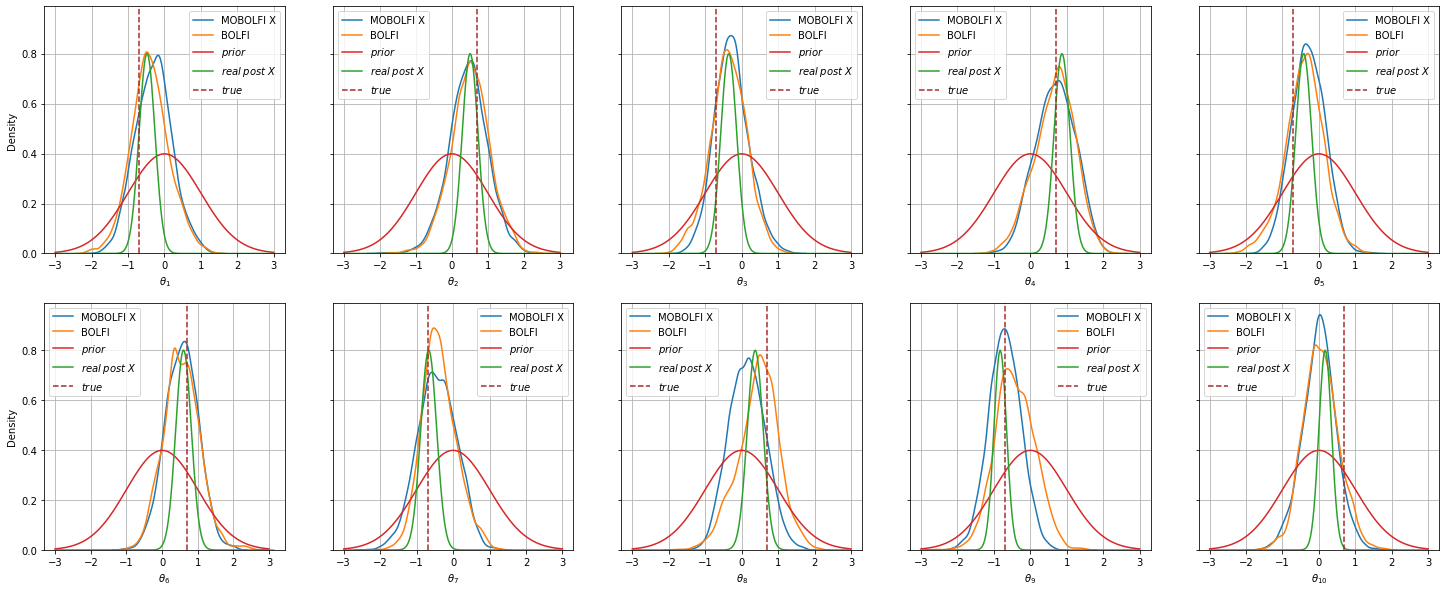

In [54]:
fig, axs = plt.subplots(2, 5, figsize=(25,10),sharey=True)

# MOBOLFI using X data only vs BOLFI vs real post of X 

sns.kdeplot(coords_hmc_X[:,0], ax=axs[0][0], label='MOBOLFI X')
sns.kdeplot(coords_hmc_bolfi[:,0], ax=axs[0][0], label='BOLFI')
axs[0][0].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][0].plot(lltheta.numpy(), true_post_x[:,0]*0.8,label='$real\;post\;X$')
axs[0][0].axvline(real_theta[0],0,1,linestyle="--",c='brown',label='$true$')
axs[0][0].legend(loc=1,fontsize=fs)
axs[0][0].grid()
axs[0][0].tick_params(axis='both', labelsize=fs)
axs[0][0].set_xlabel(r'$\theta_{1}$',fontsize=font_size_text)


sns.kdeplot(coords_hmc_X[:,1], ax=axs[0][1], label='MOBOLFI X')
sns.kdeplot(coords_hmc_bolfi[:,1], ax=axs[0][1], label='BOLFI')
axs[0][1].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][1].plot(lltheta.numpy(), true_post_x[:,1]*0.8,label='$real\;post\;X$')
axs[0][1].axvline(real_theta[1],0,1,linestyle="--",c='brown',label='$true$')
axs[0][1].legend(loc=2,fontsize=fs)
axs[0][1].grid()
axs[0][1].tick_params(axis='both', labelsize=fs)
axs[0][1].set_xlabel(r'$\theta_{2}$',fontsize=font_size_text)


sns.kdeplot(coords_hmc_X[:,2], ax=axs[0][2], label='MOBOLFI X')
sns.kdeplot(coords_hmc_bolfi[:,2], ax=axs[0][2], label='BOLFI')
axs[0][2].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][2].plot(lltheta.numpy(), true_post_x[:,2]*0.8,label='$real\;post\;X$')
axs[0][2].axvline(real_theta[2],0,1,linestyle="--",c='brown',label='$true$')
axs[0][2].legend(loc=1,fontsize=fs)
axs[0][2].grid()
axs[0][2].tick_params(axis='both', labelsize=fs)
axs[0][2].set_xlabel(r'$\theta_{3}$',fontsize=font_size_text)

sns.kdeplot(coords_hmc_X[:,3], ax=axs[0][3], label='MOBOLFI X')
sns.kdeplot(coords_hmc_bolfi[:,3], ax=axs[0][3], label='BOLFI')
axs[0][3].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][3].plot(lltheta.numpy(), true_post_x[:,3]*0.8,label='$real\;post\;X$')
axs[0][3].axvline(real_theta[3],0,1,linestyle="--",c='brown',label='$true$')
axs[0][3].legend(loc=2,fontsize=fs)
axs[0][3].grid()
axs[0][3].tick_params(axis='both', labelsize=fs)
axs[0][3].set_xlabel(r'$\theta_{4}$',fontsize=font_size_text)

sns.kdeplot(coords_hmc_X[:,4], ax=axs[0][4], label='MOBOLFI X')
sns.kdeplot(coords_hmc_bolfi[:,4], ax=axs[0][4], label='BOLFI')
axs[0][4].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][4].plot(lltheta.numpy(), true_post_x[:,4]*0.8,label='$real\;post\;X$')
axs[0][4].axvline(real_theta[4],0,1,linestyle="--",c='brown',label='$true$')
axs[0][4].legend(loc=1,fontsize=fs)
axs[0][4].grid()
axs[0][4].tick_params(axis='both', labelsize=fs)
axs[0][4].set_xlabel(r'$\theta_{5}$',fontsize=font_size_text)

sns.kdeplot(coords_hmc_X[:,5], ax=axs[1][0], label='MOBOLFI X')
sns.kdeplot(coords_hmc_bolfi[:,5], ax=axs[1][0], label='BOLFI')
axs[1][0].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][0].plot(lltheta.numpy(), true_post_x[:,5]*0.8,label='$real\;post\;X$')
axs[1][0].axvline(real_theta[5],0,1,linestyle="--",c='brown',label='$true$')
axs[1][0].legend(loc=2,fontsize=fs)
axs[1][0].grid()
axs[1][0].tick_params(axis='both', labelsize=fs)
axs[1][0].set_xlabel(r'$\theta_{6}$',fontsize=font_size_text)

sns.kdeplot(coords_hmc_X[:,6], ax=axs[1][1], label='MOBOLFI X')
sns.kdeplot(coords_hmc_bolfi[:,6], ax=axs[1][1], label='BOLFI')
axs[1][1].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][1].plot(lltheta.numpy(), true_post_x[:,6]*0.8,label='$real\;post\;X$')
axs[1][1].axvline(real_theta[6],0,1,linestyle="--",c='brown',label='$true$')
axs[1][1].legend(loc=1,fontsize=fs)
axs[1][1].grid()
axs[1][1].tick_params(axis='both', labelsize=fs)
axs[1][1].set_xlabel(r'$\theta_{7}$',fontsize=font_size_text)

sns.kdeplot(coords_hmc_X[:,7], ax=axs[1][2], label='MOBOLFI X')
sns.kdeplot(coords_hmc_bolfi[:,7], ax=axs[1][2], label='BOLFI')
axs[1][2].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][2].plot(lltheta.numpy(), true_post_x[:,7]*0.8,label='$real\;post\;X$')
axs[1][2].axvline(real_theta[7],0,1,linestyle="--",c='brown',label='$true$')
axs[1][2].legend(loc=2,fontsize=fs)
axs[1][2].grid()
axs[1][2].tick_params(axis='both', labelsize=fs)
axs[1][2].set_xlabel(r'$\theta_{8}$',fontsize=font_size_text)

sns.kdeplot(coords_hmc_X[:,8], ax=axs[1][3], label='MOBOLFI X')
sns.kdeplot(coords_hmc_bolfi[:,8], ax=axs[1][3], label='BOLFI')
axs[1][3].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][3].plot(lltheta.numpy(), true_post[:,8]*0.8,label='$real\;post\;X$')
axs[1][3].axvline(real_theta[8],0,1,linestyle="--",c='brown',label='$true$')
axs[1][3].legend(loc=1,fontsize=fs)
axs[1][3].grid()
axs[1][3].tick_params(axis='both', labelsize=fs)
axs[1][3].set_xlabel(r'$\theta_{9}$',fontsize=font_size_text)

sns.kdeplot(coords_hmc_X[:,9], ax=axs[1][4], label='MOBOLFI X')
sns.kdeplot(coords_hmc_bolfi[:,9], ax=axs[1][4], label='BOLFI')
axs[1][4].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][4].plot(lltheta.numpy(), true_post[:,9]*0.8,label='$real\;post\;X$')
axs[1][4].axvline(real_theta[9],0,1,linestyle="--",c='brown',label='$true$')
axs[1][4].legend(loc=2,fontsize=fs)
axs[1][4].grid()
axs[1][4].tick_params(axis='both', labelsize=fs)
axs[1][4].set_xlabel(r'$\theta_{10}$',fontsize=font_size_text)

plt.show()


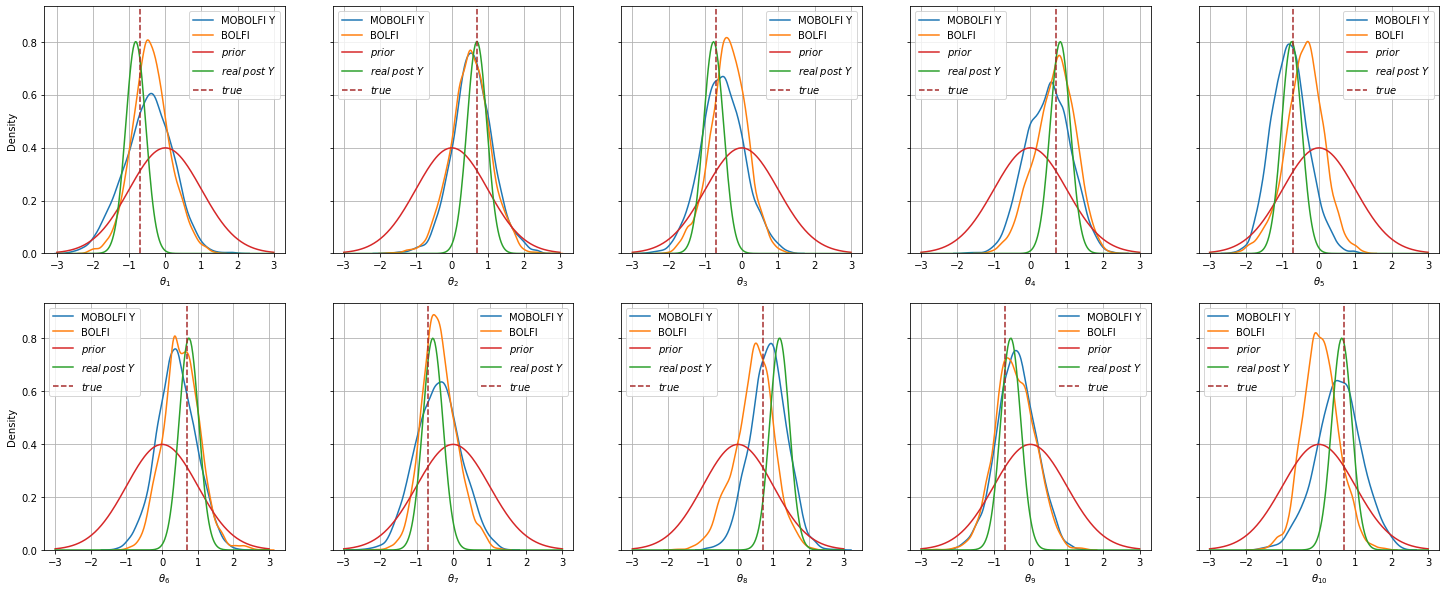

In [55]:
fig, axs = plt.subplots(2, 5, figsize=(25,10),sharey=True)

# MOBOLFI using Y data only vs BOLFI vs real post of Y

sns.kdeplot(coords_hmc_Y[:,0], ax=axs[0][0], label='MOBOLFI Y')
sns.kdeplot(coords_hmc_bolfi[:,0], ax=axs[0][0], label='BOLFI')
axs[0][0].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][0].plot(lltheta.numpy(), true_post_y[:,0]*0.8,label='$real\;post\;Y$')
axs[0][0].axvline(real_theta[0],0,1,linestyle="--",c='brown',label='$true$')
axs[0][0].legend(loc=1,fontsize=fs)
axs[0][0].grid()
axs[0][0].tick_params(axis='both', labelsize=fs)
axs[0][0].set_xlabel(r'$\theta_{1}$',fontsize=font_size_text)


sns.kdeplot(coords_hmc_Y[:,1], ax=axs[0][1], label='MOBOLFI Y')
sns.kdeplot(coords_hmc_bolfi[:,1], ax=axs[0][1], label='BOLFI')
axs[0][1].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][1].plot(lltheta.numpy(), true_post_y[:,1]*0.8,label='$real\;post\;Y$')
axs[0][1].axvline(real_theta[1],0,1,linestyle="--",c='brown',label='$true$')
axs[0][1].legend(loc=2,fontsize=fs)
axs[0][1].grid()
axs[0][1].tick_params(axis='both', labelsize=fs)
axs[0][1].set_xlabel(r'$\theta_{2}$',fontsize=font_size_text)


sns.kdeplot(coords_hmc_Y[:,2], ax=axs[0][2], label='MOBOLFI Y')
sns.kdeplot(coords_hmc_bolfi[:,2], ax=axs[0][2], label='BOLFI')
axs[0][2].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][2].plot(lltheta.numpy(), true_post_y[:,2]*0.8,label='$real\;post\;Y$')
axs[0][2].axvline(real_theta[2],0,1,linestyle="--",c='brown',label='$true$')
axs[0][2].legend(loc=1,fontsize=fs)
axs[0][2].grid()
axs[0][2].tick_params(axis='both', labelsize=fs)
axs[0][2].set_xlabel(r'$\theta_{3}$',fontsize=font_size_text)


sns.kdeplot(coords_hmc_Y[:,3], ax=axs[0][3], label='MOBOLFI Y')
sns.kdeplot(coords_hmc_bolfi[:,3], ax=axs[0][3], label='BOLFI')
axs[0][3].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][3].plot(lltheta.numpy(), true_post_y[:,3]*0.8,label='$real\;post\;Y$')
axs[0][3].axvline(real_theta[3],0,1,linestyle="--",c='brown',label='$true$')
axs[0][3].legend(loc=2,fontsize=fs)
axs[0][3].grid()
axs[0][3].tick_params(axis='both', labelsize=fs)
axs[0][3].set_xlabel(r'$\theta_{4}$',fontsize=font_size_text)


sns.kdeplot(coords_hmc_Y[:,4], ax=axs[0][4], label='MOBOLFI Y')
sns.kdeplot(coords_hmc_bolfi[:,4], ax=axs[0][4], label='BOLFI')
axs[0][4].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[0][4].plot(lltheta.numpy(), true_post_y[:,4]*0.8,label='$real\;post\;Y$')
axs[0][4].axvline(real_theta[4],0,1,linestyle="--",c='brown',label='$true$')
axs[0][4].legend(loc=1,fontsize=fs)
axs[0][4].grid()
axs[0][4].tick_params(axis='both', labelsize=fs)
axs[0][4].set_xlabel(r'$\theta_{5}$',fontsize=font_size_text)


sns.kdeplot(coords_hmc_Y[:,5], ax=axs[1][0], label='MOBOLFI Y')
sns.kdeplot(coords_hmc_bolfi[:,5], ax=axs[1][0], label='BOLFI')
axs[1][0].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][0].plot(lltheta.numpy(), true_post_y[:,5]*0.8,label='$real\;post\;Y$')
axs[1][0].axvline(real_theta[5],0,1,linestyle="--",c='brown',label='$true$')
axs[1][0].legend(loc=2,fontsize=fs)
axs[1][0].grid()
axs[1][0].tick_params(axis='both', labelsize=fs)
axs[1][0].set_xlabel(r'$\theta_{6}$',fontsize=font_size_text)


sns.kdeplot(coords_hmc_Y[:,6], ax=axs[1][1], label='MOBOLFI Y')
sns.kdeplot(coords_hmc_bolfi[:,6], ax=axs[1][1], label='BOLFI')
axs[1][1].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][1].plot(lltheta.numpy(), true_post_y[:,6]*0.8,label='$real\;post\;Y$')
axs[1][1].axvline(real_theta[6],0,1,linestyle="--",c='brown',label='$true$')
axs[1][1].legend(loc=1,fontsize=fs)
axs[1][1].grid()
axs[1][1].tick_params(axis='both', labelsize=fs)
axs[1][1].set_xlabel(r'$\theta_{7}$',fontsize=font_size_text)


sns.kdeplot(coords_hmc_Y[:,7], ax=axs[1][2], label='MOBOLFI Y')
sns.kdeplot(coords_hmc_bolfi[:,7], ax=axs[1][2], label='BOLFI')
axs[1][2].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][2].plot(lltheta.numpy(), true_post_y[:,7]*0.8,label='$real\;post\;Y$')
axs[1][2].axvline(real_theta[7],0,1,linestyle="--",c='brown',label='$true$')
axs[1][2].legend(loc=2,fontsize=fs)
axs[1][2].grid()
axs[1][2].tick_params(axis='both', labelsize=fs)
axs[1][2].set_xlabel(r'$\theta_{8}$',fontsize=font_size_text)


sns.kdeplot(coords_hmc_Y[:,8], ax=axs[1][3], label='MOBOLFI Y')
sns.kdeplot(coords_hmc_bolfi[:,8], ax=axs[1][3], label='BOLFI')
axs[1][3].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][3].plot(lltheta.numpy(), true_post_y[:,8]*0.8,label='$real\;post\;Y$')
axs[1][3].axvline(real_theta[8],0,1,linestyle="--",c='brown',label='$true$')
axs[1][3].legend(loc=1,fontsize=fs)
axs[1][3].grid()
axs[1][3].tick_params(axis='both', labelsize=fs)
axs[1][3].set_xlabel(r'$\theta_{9}$',fontsize=font_size_text)


sns.kdeplot(coords_hmc_Y[:,9], ax=axs[1][4], label='MOBOLFI Y')
sns.kdeplot(coords_hmc_bolfi[:,9], ax=axs[1][4], label='BOLFI')
axs[1][4].plot(vxx.numpy(), prior_pdf.numpy(),'C3',label='$prior$')
axs[1][4].plot(lltheta.numpy(), true_post_y[:,9]*0.8,label='$real\;post\;Y$')
axs[1][4].axvline(real_theta[9],0,1,linestyle="--",c='brown',label='$true$')
axs[1][4].legend(loc=2,fontsize=fs)
axs[1][4].grid()
axs[1][4].tick_params(axis='both', labelsize=fs)
axs[1][4].set_xlabel(r'$\theta_{10}$',fontsize=font_size_text)

plt.show()